**Tabla de contenido**

- [Examinando la red neuronal convolucional (CNN)](#Examinando-la-red-neuronal-convolucional-(CNN))
- [Implementando una CNN](#Implementando-una-CNN)
    - [Implementando una CNN como un modelo de un solo paso](#Implementando-una-CNN-como-un-modelo-de-un-solo-paso)
    - [Implementan de una CNN como modelo de varios pasos](#Implementacion-de-una-CNN-como-modelo-de-varios-pasos)
    - [Implementando una CNN como un modelo de múltiples salidas](#Implementando-una-CNN-como-un-modelo-de-multiples-salidas)
- [Próximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

En el último capítulo, examinamos e implementamos una red de memoria a largo y corto plazo (LSTM), que es un tipo de red neuronal recurrente (RNN) que procesa secuencias de datos de manera especialmente efectiva. Su implementación fue la arquitectura de mejor rendimiento para el modelo de un solo paso, el modelo de múltiples pasos y el modelo de múltiples salidas.

Ahora vamos a explorar la red neuronal convolucional (CNN). Las CNN se aplican principalmente en el campo de la visión por computadora, y esta arquitectura está detrás de muchos algoritmos para la clasificación de imágenes y la segmentación de imágenes.

Por supuesto, esta arquitectura también se puede utilizar para el análisis de series temporales. `Resulta que las CNN son resistentes al ruido y pueden filtrar de manera efectiva el ruido en una serie temporal con la operación de convolución`. Esto permite que la red produzca un conjunto de características robustas que no incluyen valores anormales. Además, las CNN suelen ser más rápidas de entrenar que las LSTM, ya que sus operaciones se pueden paralelizar.

En este capítulo, primero exploraremos la arquitectura de la CNN y entenderemos cómo la red filtra una serie temporal y crea un conjunto único de características. Luego implementaremos una CNN utilizando Keras para producir pronósticos. También combinaremos la arquitectura de la CNN con la arquitectura LSTM para ver si podemos mejorar aún más el rendimiento de nuestros modelos de aprendizaje profundo.


# Examinando la red neuronal convolucional (CNN)

Una red neuronal convolucional es una arquitectura de aprendizaje profundo que hace uso de la operación de convolución. La operación de convolución permite a la red crear un conjunto reducido de características. Por lo tanto, es una forma de regularizar la red, previniendo el sobreajuste y filtrando de manera efectiva las entradas. Por supuesto, para que esto tenga sentido, primero debes entender la operación de convolución y cómo impacta las entradas.

En términos matemáticos, una convolución es una operación sobre dos funciones que genera una tercera función que expresa cómo la forma de una función es cambiada por la otra. En una CNN, esta operación ocurre entre las entradas y un núcleo (kernel) (también conocido como filtro). El núcleo (kernel) es simplemente una matriz que se coloca sobre la matriz de características. En la siguiente figura, el núcleo (kernel) se desliza a lo largo del eje del tiempo, tomando el producto punto entre el núcleo (kernel) y las características. Esto resulta en un conjunto reducido de características, logrando regularización y el filtrado de valores anormales.

![Filtrado](fig/pasa_kernel.png)

Figura. *Visualizando el núcleo (kernel) y el mapa de características. El núcleo (kernel) es la matriz gris claro que se aplica sobre el mapa de características. Cada fila corresponde a una característica del conjunto de datos, mientras que la longitud es el eje del tiempo.*

Para entender mejor la operación de convolución, consideremos un ejemplo simple con solo una característica y un kernel, como se muestra en la siguiente figura. Para simplificar las cosas, consideraremos solo una fila de características. Ten en cuenta que el eje horizontal sigue siendo la dimensión del tiempo. El kernel es un vector más pequeño que se utiliza para realizar la operación de convolución. No te preocupes por los valores utilizados dentro del kernel y el vector de características. Son valores arbitrarios. Los valores del kernel están optimizados y cambiarán a medida que se entrena la red.

![kernel-example](fig/kernel_example.png)

Figura. *Un ejemplo simple de una fila de características y un kernel.*

Podemos visualizar la operación de convolución y su resultado en la figura. Al principio, el núcleo (kernel) está alineado con el comienzo del vector de características y se toma el producto punto entre el núcleo (kernel) y los valores del vector de características que están alineados con él.

Una vez que esto se ha hecho, el núcleo (kernel) se desplaza un paso de tiempo a la derecha; esto también se llama un paso de un tiempo. Se toma nuevamente el producto punto entre el núcleo (kernel) y el vector de características, solo con los valores que están alineados con el núcleo (kernel). El núcleo (kernel) nuevamente se desplaza un paso de tiempo a la derecha, y el proceso se repite hasta que el núcleo (kernel) alcanza el final del vector de características. Esto sucede cuando el núcleo (kernel) no se puede desplazar más, ya que todos sus valores tienen un valor de característica alineado.

Por lo tanto, en general, la longitud del vector de salida de una convolución está dada por la siguiente ecuación.
$$
output length = input length – kernel length + 1
$$

Ten en cuenta que dado que el kernel se mueve solo en una dirección (hacia la derecha), esta es una convolución 1D. Afortunadamente, Keras incluye la capa Conv1D, lo que nos permite implementarla fácilmente en Python. Esto se utiliza principalmente para la predicción de series temporales, ya que el núcleo solo puede moverse en la dimensión del tiempo. 

`Una capa de convolución reduce la longitud del conjunto de características, y realizar muchas convoluciones seguirá reduciendo el espacio de características`. Esto puede ser problemático, ya que limita el número de capas en la red, y podríamos perder demasiada información en el proceso. Una técnica común para prevenir eso es el padding. Padding simplemente significa agregar valores antes y después del vector de características para mantener la longitud de salida equivalente a la longitud de entrada. Los valores de padding suelen ser ceros. 

Así puedes ver cómo el padding mantiene constante la dimensión de la salida, permitiéndonos apilar más capas de convolución y permitiendo que la red procese características durante más tiempo. Usamos ceros para el padding porque una multiplicación por 0 se ignora. Por lo tanto, usar ceros como valores de padding suele ser una buena opción inicial.

Ahora que entiendes el funcionamiento interno de una CNN, podemos implementarla con Keras y ver si una CNN puede producir predicciones más precisas que los modelos que hemos construido hasta ahora.

# Implementando una CNN

Como en capítulos anteriores, implementaremos la arquitectura de CNN como un modelo de un solo paso, un modelo de múltiples pasos y un modelo de múltiples salidas. El modelo de un solo paso predecirá el volumen de tráfico para el siguiente paso de tiempo solamente, el modelo de múltiples pasos predecirá el volumen de tráfico para las próximas 24 horas, y el modelo de múltiples salidas predecirá la temperatura y el volumen de tráfico en el siguiente paso de tiempo.

En este capítulo, también combinaremos la arquitectura CNN con la arquitectura LSTM. Puede ser interesante ver si filtrar nuestras series temporales con una capa de convolución y luego procesar la secuencia filtrada con un LSTM mejorará la precisión de nuestras predicciones. Así, implementaremos tanto una CNN sola como la combinación de una CNN con un LSTM.

Finalmente, utilizaremos una longitud de kernel de tres pasos de tiempo en nuestra implementación de CNN. Este es un valor arbitrario, y tendrás la oportunidad de experimentar con varias longitudes de kernel en los ejercicios de este capítulo y ver cómo impactan en el rendimiento del modelo. Sin embargo, tu kernel debe tener una longitud mayor que 1; de lo contrario, simplemente estarás multiplicando el espacio de características por un escalar, y no se logrará ningún filtrado.


`Clase datawindow`

La clase se basa en el ancho de la entrada (input_width), el ancho de la etiqueta (label_width) y el desplazamiento (shift). El ancho de la entrada es simplemente el número de pasos de tiempo que se introducen en el modelo para hacer predicciones.

El ancho de la etiqueta (label_width) es equivalente al número de pasos de tiempo en las predicciones. 

Finalmente, el desplazamiento (shift) es el número de pasos de tiempo que separan la entrada de las predicciones. 

1. Nombre de la columna que deseamos predecir
2. Cree un diccionario con el nombre y el índice de la columna etiqueta. Esto se usará para trazar.
3. Cree un diccionario con el nombre y el índice de cada columna. Esto se usará para separar las entidades de la variable de destino.
4. La función de división devuelve un objeto de división que especifica cómo dividir una secuencia. En este caso, dice
que el segmento de entrada comienza en 0 y termina cuando alcanzamos el input_width.
5. Asigne índices a las entradas. Estos son útiles para trazar.
6. Obtenga el índice en el que comienza la etiqueta. En este caso, es el tamaño total de la ventana menos el ancho de la etiqueta.
7. Los mismos pasos que se aplicaron para las entradas se aplican para las etiquetas.
8. Corta la ventana para obtener las entradas usando el input_slice definido en __init__.
9. Corta la ventana para obtener las etiquetas usando labels_slice definido en __init__.
10. Si tenemos más de un objetivo, apilamos las etiquetas.
11. La forma será [lote, tiempo, características]. En este punto, solo especificamos la dimensión de tiempo y permitimos que las dimensiones de lote y características se definan más tarde.
12. Plotea las entradas. Aparecerán como una línea continua azul con puntos.
13. Grafique las etiquetas o los valores reales. Aparecerán como cuadrados verdes.
14. Traza las predicciones. Aparecerán como cruces rojas.

`Función que crea los tensores`


15. Pase los datos. Esto corresponde a nuestro conjunto de entrenamiento, conjunto de validación o conjunto de prueba.
16. Los objetivos se establecen en Ninguno, ya que son manejados por la función split_to_input_labels.
17. Define la longitud total del arreglo, que es igual a la longitud total de la ventana.
18. Define el número de pasos de tiempo que separan cada secuencia. En nuestro caso, queremos que las secuencias sean consecutivas, así que sequence_stride=1.
19. Baraja las secuencias. Ten en cuenta que los datos aún están en orden cronológico. Simplemente estamos cambiando el orden de las secuencias, lo que hace que el modelo sea más robusto.
20. Defina el número de secuencias en un solo lote. Recuerda que estamos reorganizando las secuencias en un lote. Esto significa que dentro de cada secuencia, los datos están en orden cronológico. Sin embargo, en un lote de 32 secuencias, podemos y debemos barajarlas para hacer que nuestro modelo sea más robusto y menos propenso al sobreajuste.

21. Obtenga un lote de muestra de datos para fines de representación gráfica. Si el lote de muestra no existe, recuperaremos un lote de muestra y lo almacenaremos en caché.


In [2]:
import pandas as pd
import os

file_path = lambda file: os.path.join(os.getcwd(),'data',file)
train_df = pd.read_csv(file_path('train.csv'),index_col=0)
val_df = pd.read_csv(file_path('val.csv'),index_col=0)
test_df = pd.read_csv(file_path('test.csv'),index_col=0)

train_df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,0.760019,0.0,0.758755,0.25000,0.933013
1,0.738174,0.0,0.560765,0.37059,0.982963
2,0.698884,0.0,0.463513,0.50000,1.000000
3,0.668238,0.0,0.370029,0.62941,0.982963
4,0.643093,0.0,0.325101,0.75000,0.933013


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, 
                 test_df=test_df,label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns #1
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} #2
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)} #3

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width) #4

        self.input_indices = np.arange(self.total_window_size)[self.input_slice] #5 
        self.label_start = self.total_window_size - self.label_width #6

        self.labels_slice = slice(self.label_start, None) #7 
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :] # 8
        labels = features[:, self.labels_slice, :] # 9

        if self.label_columns is not None: # 10 
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        inputs.set_shape([None, self.input_width, None]) #11 
        labels.set_shape([None, self.label_width, None])
        return inputs, labels
    # Método para trazar una muestra de ventanas de datos
    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        inputs, labels = self.sample_batch
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10) # 12
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col,None)
            else:
                label_col_index = plot_col_index
            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels',c='green', s=64) # 13
            
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :,label_col_index],marker='X', 
                            edgecolors='k', label='Predictions',c='red', s=64) #14
            if n == 0:
                plt.legend()
            plt.xlabel('Time (h)')
        
    # Función que crea los tensores con los datos temporales
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,                              # 15
            targets=None,                           #16
            sequence_length=self.total_window_size, #17
            sequence_stride=1,                      #18
            shuffle=True,                           #19
            batch_size=32                           #20
        )
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    """ 
    Concluiremos nuestra clase DataWindow definiendo algunas propiedades para aplicar 
    la función make_dataset en los conjuntos de entrenamiento, validación y prueba. 
    También crearemos un lote de muestra que almacenaremos en caché dentro de la clase para fines de trazado.
    """
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    @property
    def sample_batch(self):                          #21
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

## Implementando una CNN como un modelo de un solo paso

Comenzaremos implementando una CNN como un modelo de paso único. Recuerde que el modelo de paso único genera una predicción del volumen de tráfico en el siguiente momento usando la última característica conocida.

En este caso, sin embargo, no tiene sentido proporcionar al modelo CNN solo un paso de tiempo como entrada porque queremos realizar una convolución. En su lugar, usaremos tres valores de entrada para generar una predicción para el siguiente paso de tiempo. De esa manera, tendremos una secuencia de datos sobre la cual podemos ejecutar una operación de convolución. Además, nuestra secuencia de entrada debe tener una longitud al menos igual a la longitud del kernel, que en nuestro caso es 3. Recuerda que expresamos la relación entre la longitud de entrada, la longitud del kernel y la longitud de salida en la siguiente ecuación: $$ output length = input length – kernel length + 1$$

En esta ecuación, ninguna longitud puede ser igual a 0, ya que eso significaría que no se están procesando ni emitiendo datos. La condición de que ninguna longitud puede ser 0 solo se cumple si la longitud de entrada es mayor o igual que la longitud del kernel. Por lo tanto, nuestra secuencia de entrada debe tener al menos tres pasos de tiempo.

`Así podemos definir la ventana de datos que se utilizará para entrenar el modelo.`

In [4]:
KERNEL_WIDTH = 3
conv_window = DataWindow(input_width=KERNEL_WIDTH, label_width=1, shift=1,label_columns=['traffic_volume'])

Para fines de trazado, nos gustaría ver las predicciones del modelo durante un período de 24 horas. De esa manera, podemos evaluar los pronósticos continuos del paso de tiempo del modelo 1 a la vez, durante 24 pasos de tiempo. Por lo tanto, necesitamos definir otra ventana de datos con un label_width de 24. El desplazamiento sigue siendo 1, ya que el modelo solo predice el siguiente paso de tiempo. La longitud de entrada se obtiene reorganizando la ecuación.

$$output length = input length – kernel length + 1$$
$$input length = output length + kernel length – 1$$

Ahora podemos simplemente calcular la longitud de entrada requerida para generar predicciones en una secuencia de 24 pasos de tiempo. En este caso, la longitud de entrada es 24 + 3– 1 = 26. De esa manera, evitamos usar relleno. Más adelante, en los ejercicios, podrá intentar usar relleno en lugar de una secuencia de entrada más larga para acomodar la longitud de la salida.

Ahora podemos definir nuestra ventana de datos para trazar las predicciones del modelo.

In [5]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1
wide_conv_window = DataWindow(input_width=INPUT_WIDTH,
                              label_width=LABEL_WIDTH, 
                              shift=1, label_columns=['traffic_volume'])

Con todas las ventanas de datos listas, podemos definir nuestro modelo CNN. Nuevamente, usaremos el modelo secuencial de Keras para apilar diferentes capas. Luego usaremos la capa Conv1D, ya que estamos trabajando con series de tiempo, y el kernel solo se mueve en la dimensión temporal.

El parámetro filters es equivalente al parámetro unidades de la capa densa, y simplemente representa el número de neuronas en la convolución capa. Estableceremos kernel_size al ancho de nuestro kernel, que es 3. No necesitamos especificar las otras dimensiones, ya que Keras tomará automáticamente la forma correcta para acomodar las entradas. Luego pasaremos la salida de la CNN a una capa densa. De esa manera, el modelo aprenderá sobre un conjunto reducido de características que fueron filtradas previamente por el paso convolucional. Finalmente, generaremos una predicción con una capa densa de solo una unidad, ya que estamos pronosticando solo el volumen de tráfico para el próximo paso de tiempo.

`función ompile_and_fit`

1. La función toma un modelo y una ventana de datos de la clase DataWindow. La paciencia (patience) es el número de épocas después de las cuales el modelo debe dejar de entrenarse si la pérdida de validación no mejora; max_epochs establece un número máximo de épocas para entrenar el modelo.
2. Se rastrea la pérdida de validación para determinar si debemos aplicar la detención temprana o no.
3. El paro temprano ocurre si 3 épocas consecutivas no disminuyen la pérdida de validación, según lo establecido por el parámetro de paciencia.
4. El MSE se utiliza como la función de pérdida.
5. El MAE se utiliza como una métrica de error. Así es como comparamos el rendimiento de nuestros modelos. Un MAE más bajo significa un mejor modelo.
6. El modelo es ajustado al conjunto de entrenamiento.
7. El modelo puede entrenar un máximo de 50 épocas, según lo establecido por el parámetro max_epochs.
8. Utilizamos el conjunto de validación para calcular la pérdida de validación.
9. early_stopping se pasa como un callback. Si la pérdida de validación no disminuye después de 3 épocas consecutivas, el modelo deja de entrenar. Esto evita el sobreajuste.

In [6]:
# Función para configurar un modelo de aprendizaje profundo y ajustarlo a los datos
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

def compile_and_fit(model, window, patience=3, max_epochs=50): #1
    early_stopping = EarlyStopping(monitor='val_loss', #2
                                   patience=patience, #3
                                   mode='min')
    model.compile(loss=MeanSquaredError(), #4
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()]) #5
    
    history = model.fit(window.train, #6
                        epochs=max_epochs,#7
                        validation_data=window.val,#8
                        callbacks=[early_stopping]) #9
    return history

1. El parámetro filters es equivalente al parámetro unidades de la capa densa; define el número de neuronas en la capa convolucional.
2. Se especifica el ancho del kernel, pero se omiten las otras dimensiones, ya que Keras automáticamente
se adapta a la forma de las entradas.

In [ ]:
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense, Conv1D

cnn_model = Sequential([
    Conv1D(filters=32, #1
        kernel_size=(KERNEL_WIDTH,), #2
        activation='relu'), #3
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

A continuación, compilaremos y ajustaremos el modelo, y almacenaremos sus métricas de rendimiento para compararlas más tarde.

In [9]:
history = compile_and_fit(cnn_model, conv_window)
val_performance = {} # almacena las métricas de validación
performance = {} # almacena las métricas de test
val_performance['CNN'] = cnn_model.evaluate(conv_window.val)
performance['CNN'] = cnn_model.evaluate(conv_window.test, verbose=0)

I0000 00:00:1752249073.354775   15799 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6197 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/50


I0000 00:00:1752249075.189379   36128 service.cc:152] XLA service 0x782b340096a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752249075.189397   36128 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2025-07-11 10:51:15.215624: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752249075.332378   36128 cuda_dnn.cc:529] Loaded cuDNN version 90300


100/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0742 - mean_absolute_error: 0.2210

I0000 00:00:1752249076.024122   36128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0366 - mean_absolute_error: 0.1362 - val_loss: 0.0054 - val_mean_absolute_error: 0.0547
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0529 - val_loss: 0.0046 - val_mean_absolute_error: 0.0547
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0466 - val_loss: 0.0030 - val_mean_absolute_error: 0.0412
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0426 - val_loss: 0.0025 - val_mean_absolute_error: 0.0383
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0390 - val_loss: 0.0021 - val_mean_absolute_error: 0.0341
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0365 - val_loss: 0.0019 - val_mean_absolute_error: 0.0322
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024 - mean_absolute_error: 0.0346 - val_loss: 0.

Podemos visualizar las predicciones frente a las etiquetas utilizando el método de graficar de nuestra ventana de datos

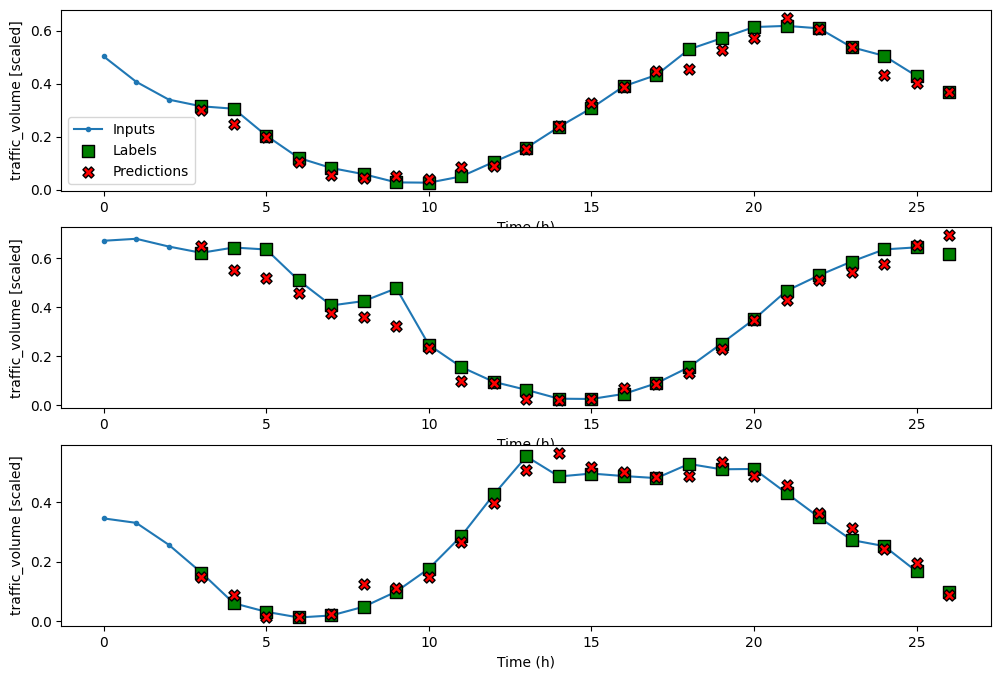

In [10]:
wide_conv_window.plot(cnn_model)

La Figura. *Predice el volumen de tráfico con una CNN como un modelo de un solo paso. El modelo toma tres valores como entrada, por lo que solo vemos una predicción en el cuarto instante de tiempo. Nuevamente, muchas predicciones (mostradas como cruces) se superponen a las etiquetas (mostradas como cuadrados), lo que significa que el modelo es bastante preciso.*

Como puede ver en la figura 16.5, muchas predicciones se superponen a las etiquetas, lo que significa que tenemos predicciones bastante precisas. Por supuesto, debemos comparar las métricas de rendimiento de este modelo con las de los otros modelos para evaluar adecuadamente su rendimiento.

Antes de hacer eso, combinemos las arquitecturas CNN y LSTM en un solo modelo. Ya viste en el capítulo anterior cómo la arquitectura LSTM resultó en los modelos de mejor rendimiento hasta el momento. Por lo tanto, es una hipótesis razonable que filtrar nuestra secuencia de entrada antes de alimentarla a un LSTM podría mejorar el rendimiento.

Por lo tanto, seguiremos la capa Conv1D con dos capas LSTM. Esta es una elección arbitraria, así que asegúrese de experimentar con ella más adelante. Rara vez hay una sola forma correcta de crear modelos, por lo que es importante mostrar lo que es posible.



In [11]:
from tensorflow.keras.layers import LSTM
cnn_lstm_model = Sequential([
    Conv1D(filters=32,
        kernel_size=(KERNEL_WIDTH,),
        activation='relu'),
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=True),
    Dense(1)
])

Luego ajustaremos el modelo y almacenaremos sus métricas de evaluación.

In [12]:
history = compile_and_fit(cnn_lstm_model, conv_window)
val_performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.val)
performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.test,verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0774 - mean_absolute_error: 0.1991 - val_loss: 0.0065 - val_mean_absolute_error: 0.0601
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0571 - val_loss: 0.0041 - val_mean_absolute_error: 0.0469
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0495 - val_loss: 0.0032 - val_mean_absolute_error: 0.0419
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0450 - val_loss: 0.0031 - val_mean_absolute_error: 0.0414
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0419 - val_loss: 0.0029 - val_mean_absolute_error: 0.0408
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0406 - val_loss: 0.0025 - val_mean_absolute_error: 0.0369
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0393 - v

Con ambos modelos construidos y evaluados, podemos ver el MAE de nuestros modelos recién construidos.

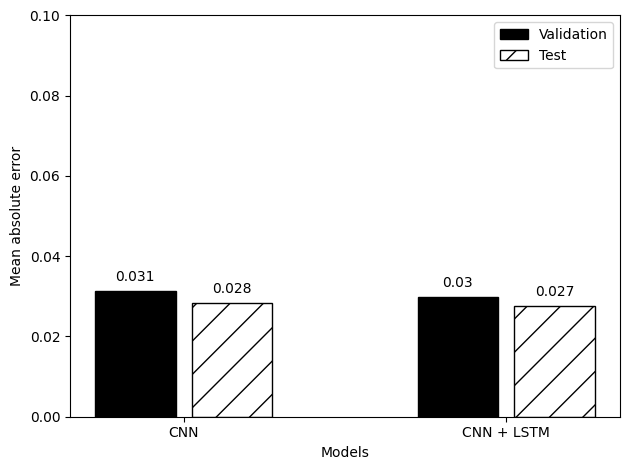

In [19]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(6)

labels = ['CNN', 'CNN + LSTM']

x = np.arange(len(performance))
fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black',label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black',hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')

plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

Estos resultados podrían explicarse por la longitud de la secuencia de entrada. Al modelo se le da solo una secuencia de entrada de tres valores, lo que podría no ser suficiente para que la CNN extraiga características valiosas para las predicciones. Si bien una CNN es mejor que el modelo de referencia y el modelo lineal, el LSTM sigue siendo el modelo de un solo paso de mejor rendimiento por ahora.

## Implementacion de una CNN como modelo de varios pasos

Ahora pasaremos al modelo de varios pasos. Aquí usaremos las últimas 24 horas conocidas para pronosticar el volumen de tráfico en las próximas 24 horas.Para esto utilizaremos la ecuación

$$input length = output length + kernel length – 1$$

Nuevamente, tenga en cuenta que la convolución reduce la longitud de las entidades, pero aún esperamos que el modelo genere 24 predicciones en una sola disparo.

In [20]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1
multi_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH,shift=24, label_columns=['traffic_volume'])

A continuación, definiremos el modelo CNN. Nuevamente, usaremos el modelo secuencial, en el que apilaremos la capa Conv1D, seguida de una capa densa con 32 neuronas y luego una capa densa con una unidad, ya que estamos prediciendo solo el volumen de tráfico.

In [21]:
ms_cnn_model = Sequential([
    Conv1D(32, activation='relu', kernel_size=(KERNEL_WIDTH)),
    Dense(units=32, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

Luego podemos entrenar el modelo y almacenar sus métricas de rendimiento para compararlas más adelante.

In [22]:
history = compile_and_fit(ms_cnn_model, multi_window)
ms_val_performance = {}
ms_performance = {}
ms_val_performance['CNN'] = ms_cnn_model.evaluate(multi_window.val)
ms_performance['CNN'] = ms_cnn_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0810 - mean_absolute_error: 0.2006 - val_loss: 0.0162 - val_mean_absolute_error: 0.0849
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - mean_absolute_error: 0.0787 - val_loss: 0.0156 - val_mean_absolute_error: 0.0832
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0138 - mean_absolute_error: 0.0779 - val_loss: 0.0154 - val_mean_absolute_error: 0.0841
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0135 - mean_absolute_error: 0.0770 - val_loss: 0.0152 - val_mean_absolute_error: 0.0795
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0768 - val_loss: 0.0152 - val_mean_absolute_error: 0.0793
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0132 - mean_absolute_error: 0.0763 - val_loss: 0.0147 - val_mean_absolute_error: 0.0794
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0130 - mean_absolute_error: 0.0755 - v

Combinemos la arquitectura CNN con la arquitectura LSTM como antes. Aquí simplemente sustituiremos la capa Dense intermedia por una capa LSTM. Una vez que el modelo esté definido, podemos ajustarlo y almacenar sus métricas de rendimiento.


In [23]:
ms_cnn_lstm_model = Sequential([
    Conv1D(32, activation='relu', kernel_size=(KERNEL_WIDTH)),
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])
history = compile_and_fit(ms_cnn_lstm_model, multi_window)
ms_val_performance['CNN + LSTM'] = ms_cnn_lstm_model.evaluate(multi_window.val)
ms_performance['CNN + LSTM'] = ms_cnn_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0830 - mean_absolute_error: 0.2156 - val_loss: 0.0182 - val_mean_absolute_error: 0.0942
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0863 - val_loss: 0.0164 - val_mean_absolute_error: 0.0852
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0803 - val_loss: 0.0159 - val_mean_absolute_error: 0.0829
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0792 - val_loss: 0.0156 - val_mean_absolute_error: 0.0823
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0781 - val_loss: 0.0153 - val_mean_absolute_error: 0.0804
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0765 - val_loss: 0.0152 - val_mean_absolute_error: 0.0828
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0758 - v

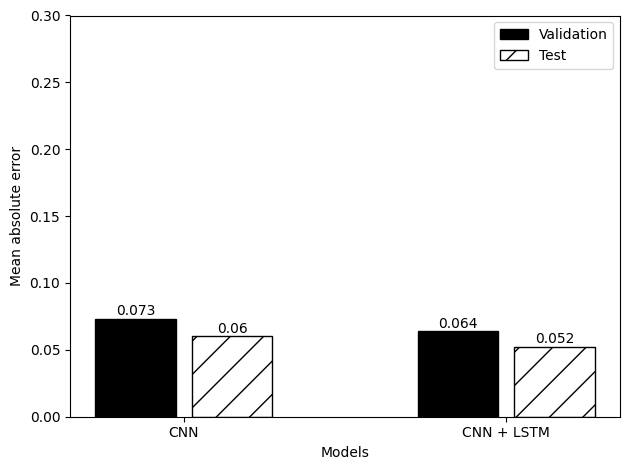

In [24]:
mae_val = [v[1] for v in ms_val_performance.values()]
mae_test = [v[1] for v in ms_performance.values()]
labels = ['CNN', 'CNN + LSTM']
x = np.arange(len(performance))
fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black',label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black',hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')

plt.ylim(0, 0.3)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

Figura. El MAE de todos los modelos de varios pasos construidos hasta el momento.La combinación de la CNN con un LSTM resultó en la MAE más baja de todas.

## Implementando una CNN como un modelo de multiples salidas

Finalmente, implementaremos la arquitectura CNN como un modelo de múltiples salidas. En este caso, deseamos predecir la temperatura y el volumen de tráfico solo para el siguiente intervalo de tiempo.

Hemos visto que dar una secuencia de entrada de longitud 3 no era suficiente para que el modelo CNN extrajera características significativas, por lo que utilizaremos la misma longitud de entrada que para el modelo de múltiples pasos. Sin embargo, esta vez, estamos pronosticando un paso de tiempo a la vez durante 24 pasos de tiempo.

Definiremos nuestra ventana de datos de la siguiente manera:

In [25]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1

wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=24, shift=1, label_columns=['temp', 'traffic_volume'])

A estas alturas ya debería sentirse cómodo construyendo modelos con Keras, por lo que definir la arquitectura CNN como un modelo de múltiples salidas debería ser sencillo. Nuevamente, usaremos el modelo secuencial, en el que apilaremos una capa Conv1D, seguida de una capa densa, lo que permitirá que la red aprenda en un conjunto de funciones filtradas. La capa de salida tendrá dos neuronas, ya que estamos pronosticando tanto la temperatura como el volumen de tráfico. A continuación, ajustaremos el modelo y almacenaremos sus métricas de rendimiento.

In [26]:
mo_cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2)
])

history = compile_and_fit(mo_cnn_model, wide_mo_conv_window)
mo_val_performance = {}
mo_performance = {}
mo_val_performance['CNN'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN'] = mo_cnn_model.evaluate(wide_mo_conv_window.test,verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0342 - mean_absolute_error: 0.1190 - val_loss: 0.0026 - val_mean_absolute_error: 0.0338
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0329 - val_loss: 0.0017 - val_mean_absolute_error: 0.0273
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0277 - val_loss: 0.0015 - val_mean_absolute_error: 0.0257
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0255 - val_loss: 0.0013 - val_mean_absolute_error: 0.0231
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - mean_absolute_error: 0.0240 - val_loss: 0.0012 - val_mean_absolute_error: 0.0229
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0231 - val_loss: 0.0012 - val_mean_absolute_error: 0.0224
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0225 - v

También podemos combinar la arquitectura CNN con la arquitectura LSTM como se hizo anteriormente. Simplemente reemplazaremos la capa densa intermedia con una capa LSTM, ajustaremos el modelo y almacenaremos sus métricas.

In [27]:
mo_cnn_lstm_model = Sequential([
    Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
    LSTM(32, return_sequences=True),
    Dense(units=2)
])
history = compile_and_fit(mo_cnn_lstm_model, wide_mo_conv_window)
mo_val_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.test, verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0539 - mean_absolute_error: 0.1529 - val_loss: 0.0041 - val_mean_absolute_error: 0.0433
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0406 - val_loss: 0.0022 - val_mean_absolute_error: 0.0328
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0328 - val_loss: 0.0017 - val_mean_absolute_error: 0.0291
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0294 - val_loss: 0.0015 - val_mean_absolute_error: 0.0262
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0272 - val_loss: 0.0014 - val_mean_absolute_error: 0.0256
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0258 - val_loss: 0.0012 - val_mean_absolute_error: 0.0239
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0248 - v

Como de costumbre, compararemos el rendimiento de los nuevos modelos con los modelos anteriores.

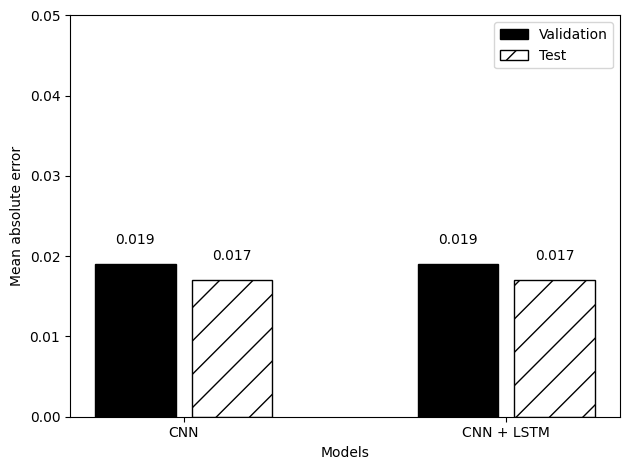

In [29]:
mae_val = [v[1] for v in mo_val_performance.values()]
mae_test = [v[1] for v in mo_performance.values()]
labels = ['CNN', 'CNN + LSTM']
x = np.arange(len(performance))
fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black',label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black',hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')

plt.ylim(0, 0.05)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

Figura. El MAE de todos los modelos de múltiples salidas construidos hasta el momento. Como puede ver, la CNN y la combinación de CNN y LSTM no resultaron en mejoras sobre el modelo LSTM.

Explicar este comportamiento es difícil, ya que los modelos de aprendizaje profundo son cajas negras, lo que significa que son difíciles de interpretar. Si bien pueden ser muy eficientes, la compensación radica en su explicabilidad. Métodos para interpretar la red neuronal los modelos existen, pero están fuera del alcance de este libro.

# Proximos pasos

En este capítulo, examinamos la arquitectura de la CNN. Observamos cómo se usa la operación de convolución en la red y cómo filtra efectivamente la secuencia de entrada con el uso de un kernel. Luego implementamos la arquitectura CNN y la combinamos con la arquitectura LSTM para producir dos nuevos modelos de un solo paso, modelos de varios pasos y modelos de múltiples salidas.

En el caso de los modelos de un solo paso, el uso de una CNN no mejoró los resultados. De hecho, funcionó peor que el LSTM solo. Para los modelos de varios pasos, observamos una ligera mejora en el rendimiento y obtuvimos el modelo de varios pasos de mejor rendimiento con la combinación de una CNN y un LSTM. En el caso del modelo de múltiples salidas, el uso de una CNN resultó en un rendimiento constante, por lo que tenemos un empate entre la CNN, el LSTM y la combinación de CNN y LSTM. Así, podemos ver que una CNN no necesariamente resulta en el modelo de mejor rendimiento. En una situación sí lo hizo, en otra no, y en otra no hubo diferencia.

Es importante considerar la arquitectura de la CNN como una herramienta en tu conjunto de herramientas cuando se trata de modelar con aprendizaje profundo. Los modelos funcionarán de manera diferente dependiendo del conjunto de datos y el objetivo de pronóstico. La clave radica en segmentar tus datos correctamente, como lo hace la clase DataWindow, y en seguir una metodología de pruebas, como hemos hecho al mantener constante el conjunto de entrenamiento, el conjunto de validación y el conjunto de pruebas, y evaluar todos los modelos utilizando el MAE contra modelos de referencia.

La última arquitectura de aprendizaje profundo que vamos a explorar se refiere específicamente a los modelos de múltiples pasos. Hasta ahora, todos los modelos de múltiples pasos han generado predicciones para las próximas 24 horas en una sola vez. Sin embargo, es posible predecir gradualmente las próximas 24 horas e introducir una predicción anterior en el modelo para generar la siguiente predicción. Esto se realiza especialmente con la arquitectura LSTM, lo que resulta en un LSTM autorregresivo (ARLSTM). Este será el tema del próximo capítulo.

# Resumen

- La red neuronal convolucional (CNN) es una arquitectura de aprendizaje profundo que utiliza la operación de convolución.
- La operación de convolución se realiza entre un kernel y el espacio de características. Es simplemente el producto punto entre el kernel y el vector de características.
- Ejecutar una operación de convolución resulta en una secuencia de salida que es más corta que la secuencia de entrada. Por lo tanto, ejecutar muchas convoluciones puede disminuir rápidamente la longitud de salida. El padding se puede usar para evitar eso.
- En la previsión de series temporales, la convolución se realiza en una sola dimensión: la dimensión temporal.
- La CNN es solo otro modelo en su caja de herramientas y es posible que no siempre sea el modelo de mejor rendimiento. Asegúrese de mostrar sus datos correctamente con DataWindow y mantenga válida su metodología de prueba manteniendo constante cada conjunto de datos, construyendo modelos de referencia y evaluar todos los modelos con la misma métrica de error
